In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
df = pd.read_csv("Traffic_Crashes-Crashes.csv")

df = df.drop(columns=['crash_record_id']).reset_index(drop=True)
#df = df.drop(columns=['CRASH_RECORD_ID']).fillna('NULL').reset_index(drop=True)

col_names = [
    'crash_date_est_i', 'crash_date', 
    'posted_speed_limit', 'traffic_control_device', 'device_condition', 'weather_condition', 'lighting_condition', 
    'first_crash_type', 'trafficway_type', 'lane_cnt', 'alignment', 'roadway_surface_cond', 
    'road_defect', 'report_type', 'crash_type', 'intersection_related_i', 'not_right_of_way_i', 
    'hit_and_run_i', 'damage', 'date_police_notified', 'prim_contributory_cause', 'sec_contributory_cause', 
    'street_num', 'street_direction', 'street_name', 'beat_of_occurence', 'photos_taken_i', 
    'statements_taken_i', 'dooring_i', 'work_zone_i', 'work_zone_type', 'workers_present_i', 
    'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal', 'injuries_incapacitating', 
    'injuries_non_incapacitating', 'injuries_reported_not_evident', 'injuries_no_indication', 'injuries_unknown', 'crash_hour', 
    'crash_day_of_week', 'crash_month', 'latitude', 'longitude', 'crash_location'
]

df.to_csv('/Users/briandunn/Desktop/Apache Kafka- Kafka Connect/Chicago Traffic Crashes CPD/data/Traffic_Crashes-Crashes.csv',
          index=True,
          index_label='crash_record_id',
          header=col_names)

df

,crash_date_est_i,crash_date,posted_speed_limit,traffic_control_device,device_condition,weather_condition,lighting_condition,first_crash_type,trafficway_type,lane_cnt,...,injuries_non_incapacitating,injuries_reported_not_evident,injuries_no_indication,injuries_unknown,crash_hour,crash_day_of_week,crash_month,latitude,longitude,crash_location
0,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",NaN,...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,NaN,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),NaN,...,0.0,0.0,1.0,0.0,14,7,7,41.854120,-87.665902,POINT (-87.665902342962 41.854120262952)
3,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,NaN,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,NaN,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794951,NaN,11/06/2023 07:00:00 AM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,0.0,0.0,1.0,0.0,7,2,11,41.923618,-87.656457,POINT (-87.656457235481 41.923618409759)
794952,NaN,10/31/2023 06:30:00 PM,30,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,SIDESWIPE SAME DIRECTION,OTHER,NaN,...,0.0,0.0,2.0,0.0,18,3,10,41.722257,-87.585276,POINT (-87.585275565077 41.722257273006)
794953,NaN,11/04/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,ONE-WAY,NaN,...,0.0,0.0,1.0,0.0,23,7,11,41.705477,-87.621737,POINT (-87.621736842174 41.705477132435)
794954,NaN,11/06/2023 06:35:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,NaN,...,0.0,0.0,4.0,0.0,18,2,11,41.778165,-87.750264,POINT (-87.750264456164 41.778165162179)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 794956 entries, 0 to 794955
Data columns (total 47 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   CRASH_DATE_EST_I               59606 non-null   object 
 1   CRASH_DATE                     794956 non-null  object 
 2   POSTED_SPEED_LIMIT             794956 non-null  int64  
 3   TRAFFIC_CONTROL_DEVICE         794956 non-null  object 
 4   DEVICE_CONDITION               794956 non-null  object 
 5   WEATHER_CONDITION              794956 non-null  object 
 6   LIGHTING_CONDITION             794956 non-null  object 
 7   FIRST_CRASH_TYPE               794956 non-null  object 
 8   TRAFFICWAY_TYPE                794956 non-null  object 
 9   LANE_CNT                       199006 non-null  float64
 10  ALIGNMENT                      794956 non-null  object 
 11  ROADWAY_SURFACE_COND           794956 non-null  object 
 12  ROAD_DEFECT                   

In [6]:
df.describe()

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
count,794956.000000,1.990060e+05,794956.000000,794951.000000,794956.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.000000,793215.0,794956.000000,794956.000000,794956.000000,789567.000000,789567.000000
mean,28.402547,1.333032e+01,3688.085435,1242.916397,2.034919,0.189448,0.001195,0.020032,0.107025,0.061195,2.004313,0.0,13.202800,4.122344,6.787978,41.854788,-87.673450
std,6.179272,2.961623e+03,2887.990566,705.268208,0.452475,0.565654,0.037456,0.165673,0.422095,0.318451,1.158715,0.0,5.568727,1.980411,3.405398,0.337523,0.686153
min,0.000000,0.000000e+00,0.000000,111.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,-87.936193
25%,30.000000,2.000000e+00,1248.000000,714.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,9.000000,2.000000,4.000000,41.782429,-87.721709
50%,30.000000,2.000000e+00,3201.000000,1211.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,14.000000,4.000000,7.000000,41.874743,-87.674094
75%,30.000000,4.000000e+00,5600.000000,1822.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.0,17.000000,6.000000,10.000000,41.924336,-87.633300
max,99.000000,1.191625e+06,451100.000000,6100.000000,18.000000,21.000000,4.000000,10.000000,21.000000,15.000000,61.000000,0.0,23.000000,7.000000,12.000000,42.022780,0.000000


In [7]:
df.nunique()

CRASH_DATE_EST_I                      2
CRASH_DATE                       521033
POSTED_SPEED_LIMIT                   45
TRAFFIC_CONTROL_DEVICE               19
DEVICE_CONDITION                      8
WEATHER_CONDITION                    12
LIGHTING_CONDITION                    6
FIRST_CRASH_TYPE                     18
TRAFFICWAY_TYPE                      20
LANE_CNT                             41
ALIGNMENT                             6
ROADWAY_SURFACE_COND                  7
ROAD_DEFECT                           7
REPORT_TYPE                           3
CRASH_TYPE                            2
INTERSECTION_RELATED_I                2
NOT_RIGHT_OF_WAY_I                    2
HIT_AND_RUN_I                         2
DAMAGE                                3
DATE_POLICE_NOTIFIED             603015
PRIM_CONTRIBUTORY_CAUSE              40
SEC_CONTRIBUTORY_CAUSE               40
STREET_NO                         11694
STREET_DIRECTION                      4
STREET_NAME                        1632


In [8]:
text_to_write = ""
cols_to_iter_thru = df.select_dtypes(include=['object', 'string', 'category']).columns
cols_to_iter_thru = cols_to_iter_thru.drop(
    [
        'crash_record_id', 
        'crash_date',
        'crash_location',
        'date_police_notified', 
        'street_name'
    ], 
    errors='ignore')

for col in cols_to_iter_thru:
    text_to_write += f'Unique values in {col}: '
    for x in df[col].unique():
        text_to_write += (str(x) + ', ')
    text_to_write += '\n'

with open(os.path.join(os.getcwd(), "unique_values.txt"), 'w+') as f:
    f.write(text_to_write)

In [9]:
corr_matrix = df.corr(method='pearson')

corr_matrix

,POSTED_SPEED_LIMIT,LANE_CNT,STREET_NO,BEAT_OF_OCCURRENCE,NUM_UNITS,INJURIES_TOTAL,INJURIES_FATAL,INJURIES_INCAPACITATING,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE
POSTED_SPEED_LIMIT,1.000000,0.000979,-0.020123,-0.035341,0.047726,0.076919,0.007573,0.029236,0.059145,0.042133,0.101563,NaN,0.014422,0.008011,0.011860,-0.003453,0.006607
LANE_CNT,0.000979,1.000000,-0.000889,0.003390,-0.000278,-0.001129,-0.000102,-0.000415,-0.000838,-0.000672,-0.001819,NaN,0.000268,0.002889,-0.001943,0.000833,0.000092
STREET_NO,-0.020123,-0.000889,1.000000,-0.008594,0.007105,0.010835,0.006564,0.003950,0.008359,0.005339,-0.038383,NaN,-0.000531,-0.008220,0.000156,-0.073916,-0.011187
BEAT_OF_OCCURRENCE,-0.035341,0.003390,-0.008594,1.000000,0.021767,-0.038648,-0.007690,-0.014845,-0.031874,-0.017774,-0.009375,NaN,0.006596,0.003714,0.002218,0.153469,-0.042398
NUM_UNITS,0.047726,-0.000278,0.007105,0.021767,1.000000,0.108610,0.008893,0.038316,0.083704,0.060994,0.169670,NaN,0.005078,0.001255,0.010293,0.003323,-0.002500
INJURIES_TOTAL,0.076919,-0.001129,0.010835,-0.038648,0.108610,1.000000,0.098798,0.339581,0.767591,0.570568,-0.183392,NaN,0.002604,-0.004893,0.013269,-0.015593,0.005444
INJURIES_FATAL,0.007573,-0.000102,0.006564,-0.007690,0.008893,0.098798,1.000000,0.046322,0.022689,0.003698,-0.030618,NaN,-0.005889,-0.002029,0.001406,-0.002637,0.000129
INJURIES_INCAPACITATING,0.029236,-0.000415,0.003950,-0.014845,0.038316,0.339581,0.046322,1.000000,0.053712,0.006299,-0.082054,NaN,-0.004566,-0.002460,0.004553,-0.002896,0.000363
INJURIES_NON_INCAPACITATING,0.059145,-0.000838,0.008359,-0.031874,0.083704,0.767591,0.022689,0.053712,1.000000,0.007371,-0.148702,NaN,0.000726,-0.004774,0.010328,-0.009224,0.001712
INJURIES_REPORTED_NOT_EVIDENT,0.042133,-0.000672,0.005339,-0.017774,0.060994,0.570568,0.003698,0.006299,0.007371,1.000000,-0.082364,NaN,0.006732,-0.000846,0.007345,-0.013652,0.007197


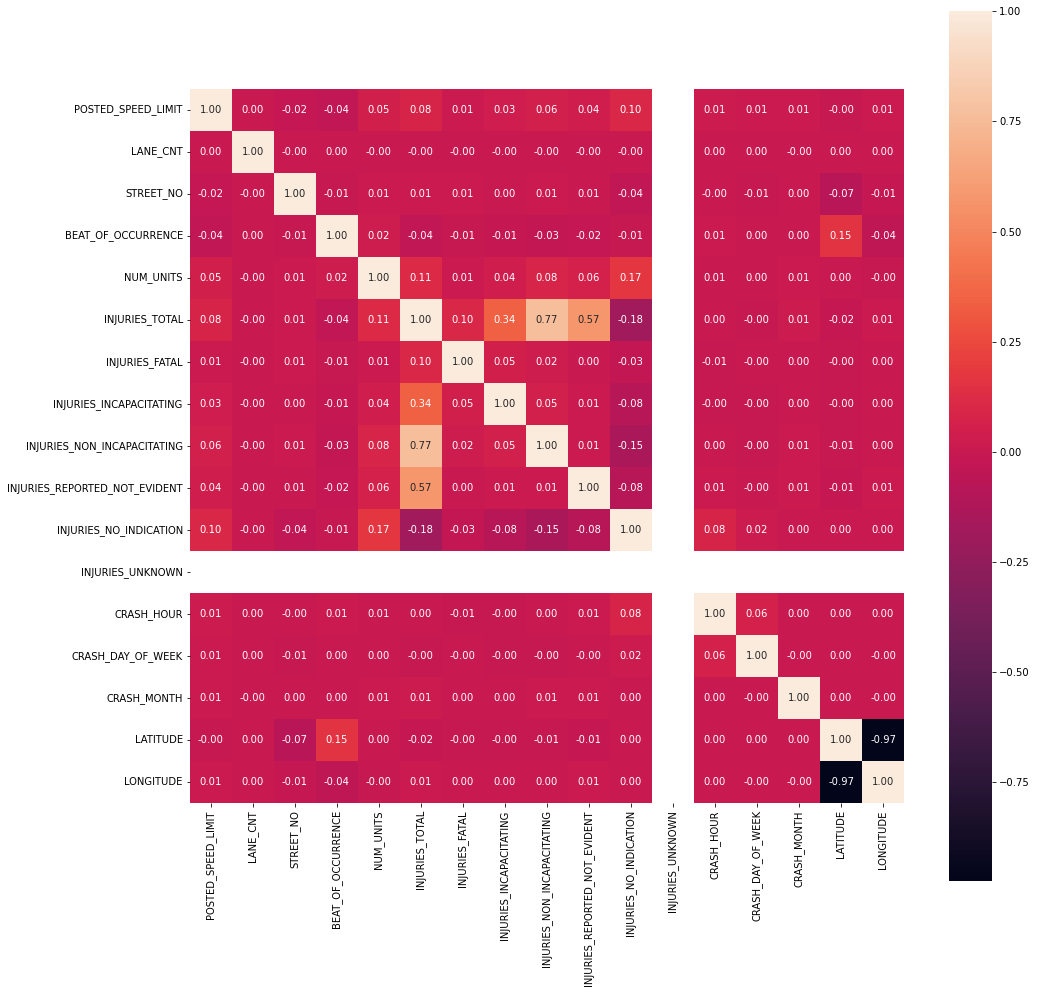

In [10]:
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, annot=True, fmt='0.2f', square=True)
plt.show()